Chọn 1 bộ dữ liệu time-series bất kì trong đây link text ([Liên kết đến một trang bên ngoài.](https://github.com/thieu1995/csv-files)), và lấy ra một cột time-series, xây dựng mô hình dự đoán dùng AR, MA, ARMA và ARIMA models.

Với yêu cầu các models bên trên phải được tối ưu hóa tham số mô hình, các mô hình được so sánh dựa trên giá trị AIC. Model nào có giá trị AIC càng nhỏ thì càng tốt. Tối ưu tham số bằng cách duyệt những giá trị có thể dùng for.

Sau đó so sánh kêt quả của 4 models đã được tối ưu tham số từ 4 mô hình bên trên dựa vào giá trị RMSE của tập test. 

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.metrics import mean_squared_error

In [4]:
def get_df():
    df = pd.read_csv("AirPassengers.csv")
    df.head()
    df.columns = ['Date','#Passengers']
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    return df

df = get_df()
df.head(10)

,Date,#Passengers,Year,Month
0,1949-01-01,112,1949,1
1,1949-02-01,118,1949,2
2,1949-03-01,132,1949,3
3,1949-04-01,129,1949,4
4,1949-05-01,121,1949,5
5,1949-06-01,135,1949,6
6,1949-07-01,148,1949,7
7,1949-08-01,148,1949,8
8,1949-09-01,136,1949,9
9,1949-10-01,119,1949,10


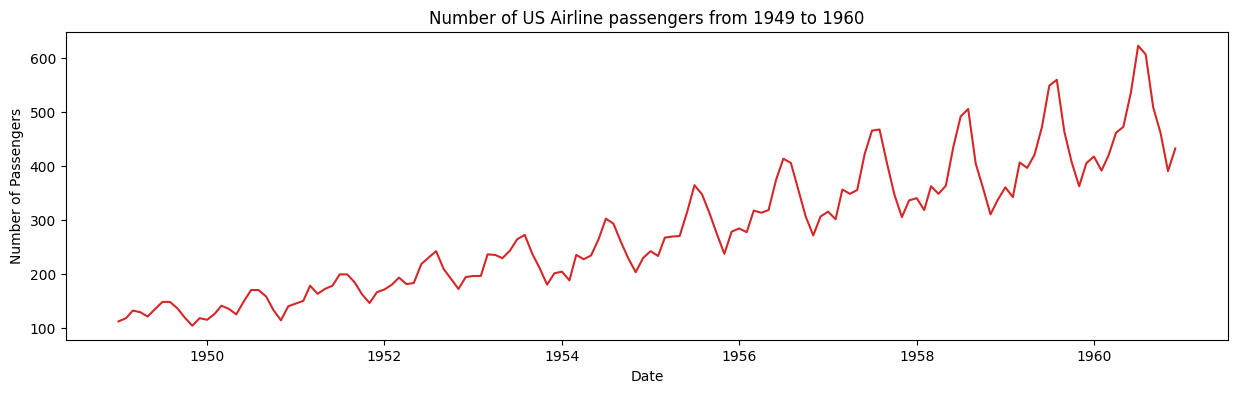

In [6]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100, color="blue"):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=color)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['Date'], y=df['#Passengers'], title='Number of US Airline passengers from 1949 to 1960', color="tab:red")

In [7]:
df2 = df.pivot(index='Month', columns='Year', values='#Passengers')
df2.head(12)

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
1,112,115,145,171,196,204,242,284,315,340,360,417
2,118,126,150,180,196,188,233,277,301,318,342,391
3,132,141,178,193,236,235,267,317,356,362,406,419
4,129,135,163,181,235,227,269,313,348,348,396,461
5,121,125,172,183,229,234,270,318,355,363,420,472
6,135,149,178,218,243,264,315,374,422,435,472,535
7,148,170,199,230,264,302,364,413,465,491,548,622
8,148,170,199,242,272,293,347,405,467,505,559,606
9,136,158,184,209,237,259,312,355,404,404,463,508


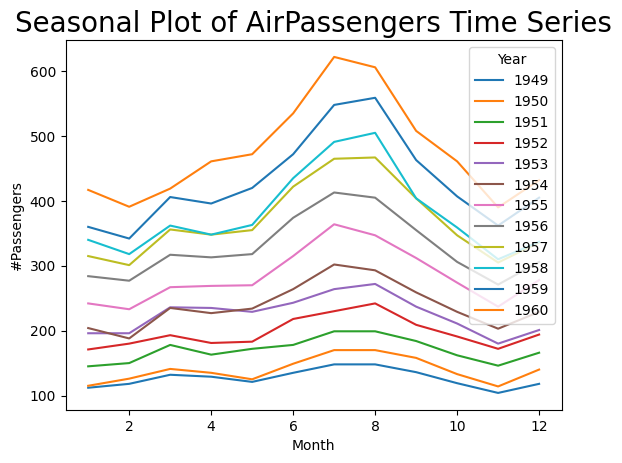

In [8]:
df2.plot()
plt.title("Seasonal Plot of AirPassengers Time Series", fontsize=20)
plt.ylabel("#Passengers")
plt.show()

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

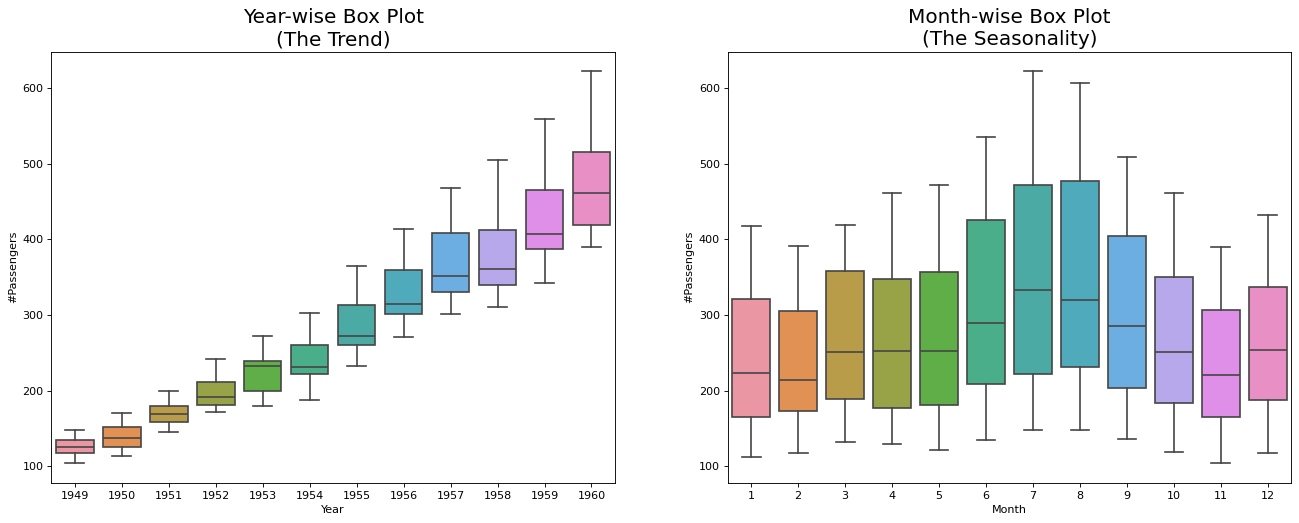

In [10]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='#Passengers', data=df, ax=axes[0])
sns.boxplot(x='Month', y='#Passengers', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [62]:
# First Order Differencing
df = get_df()
ts_diff = np.diff(df['#Passengers'])
df['#passengers_diff1'] = np.append([0], ts_diff)
data = df['#passengers_diff1'].values
size_dataset = len(data)
train, test = data[:size_dataset-10], data[size_dataset-10:]

## AR (Autoregressive) model

In [45]:
from statsmodels.tsa.ar_model import AutoReg

# Fit the AutoReg model on the training data
model = AutoReg(train, lags=5)      # lags = (1, 2, 3, 4, 5)
model_01 = model.fit()             # get the fitted model.

# Print the model summary
print(model_01.summary())
print('AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'.format(model_01.aic, model_01.hqic, model_01.bic))

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  134
Model:                     AutoReg(5)   Log Likelihood                -614.214
Method:               Conditional MLE   S.D. of innovations             28.287
Date:                Tue, 28 May 2024   AIC                           1242.429
Time:                        10:50:05   BIC                           1262.448
Sample:                             5   HQIC                          1250.563
                                  134                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3704      2.529      0.937      0.349      -2.586       7.327
y.L1           0.2913      0.089      3.289      0.001       0.118       0.465
y.L2          -0.1910      0.089     -2.135      0.0

In [63]:
from permetrics import RegressionMetric

def get_ar_model_results(data_length=None, train=None, test=None, lags=3, seasonal=False, period=12):
    model = AutoReg(train, lags=lags, seasonal=seasonal, period=period)
    model_results = model.fit()
    # Results on training set
    res_train = {
        "aic": model_results.aic,
        "hqic": model_results.hqic,
        "bic": model_results.bic,
    }

    ## Results on testing set
    pred = model_results.predict(start=len(train), end=data_length-1, dynamic=False)
    evaluator = RegressionMetric(test, pred)
    res_test = evaluator.get_metrics_by_list_names(["RMSE", "MAE", "MAPE", "R2", "NSE", "KGE"])

    return {**res_train, **res_test}


list_lags = [3, 6, 9, 12]
list_seasonal = [True, False]
list_period = [6, 12, 18, 24]
best_lags = 3
best_seasonal = True
best_period = 6
best_aic = None

for id_lag, lags in enumerate(list_lags):
    for id_ss, seasonal in enumerate(list_seasonal):
        for id_period, period in enumerate(list_period):
            res = get_ar_model_results(len(data), train, test, lags, seasonal, period)
            print(f"Lag={lags}, Seasonal={seasonal}, Period={period}, {res}")
            if best_aic is None or best_aic > res['aic']:
                best_aic = res['aic']
                best_lags = lags
                best_seasonal = seasonal
                best_period = period

Lag=3, Seasonal=True, Period=6, {'aic': 1218.9059167118999, 'hqic': 1230.5891283155947, 'bic': 1247.6578899439114, 'RMSE': 49.42317192982797, 'MAE': 42.13395424289384, 'MAPE': 0.9622793460373595, 'R2': 0.25784421196389995, 'NSE': 0.25784421196389995, 'KGE': -4.107160086921633}
Lag=3, Seasonal=True, Period=12, {'aic': 1102.253737496579, 'hqic': 1120.9468760624907, 'bic': 1148.2568946677975, 'RMSE': 32.93466770939997, 'MAE': 26.57237375653599, 'MAPE': 0.5176016103476102, 'R2': 0.6704355018462085, 'NSE': 0.6704355018462085, 'KGE': 0.5572906919998353}
Lag=3, Seasonal=True, Period=18, {'aic': 1238.888117002078, 'hqic': 1264.5911825302064, 'bic': 1302.1424581125032, 'RMSE': 53.035268232823356, 'MAE': 44.95381520859204, 'MAPE': 1.0112846440132188, 'R2': 0.14539901481561268, 'NSE': 0.14539901481561268, 'KGE': -1.0729078122396016}
Lag=3, Seasonal=True, Period=24, {'aic': 1121.4749785826546, 'hqic': 1154.187971073, 'bic': 1201.9805036322869, 'RMSE': 33.18075293053285, 'MAE': 26.818458643547626, 

Coefficients: [ 13.13170927 -16.47489954  10.45786505   2.77217048 -10.85983496
  -6.30313485   5.15972143  -8.23636963 -10.95058713  -8.56410973
 -14.50906558  -3.63578633  -7.21797712 -19.9845958   -5.05114846
  -8.89023636 -14.13653931   7.15606822  -1.53047489  -7.91088558
 -21.86986475  -6.53237442 -16.45690435  -5.73583633  -0.16642405
  -0.13446938  -0.21448887  -0.25154044  -0.08346989  -0.2377694
  -0.14712315  -0.21544028  -0.15887689  -0.28881452  -0.03451979
   0.64717875]
predicted=48.970104, expected=28.000000
predicted=-19.370282, expected=42.000000
predicted=24.263389, expected=11.000000
predicted=65.455471, expected=63.000000
predicted=77.396603, expected=87.000000
predicted=8.027598, expected=-16.000000
predicted=-103.442250, expected=-98.000000
predicted=-58.367218, expected=-47.000000
predicted=-49.767216, expected=-71.000000
predicted=49.418132, expected=42.000000
Test RMSE: 23.921


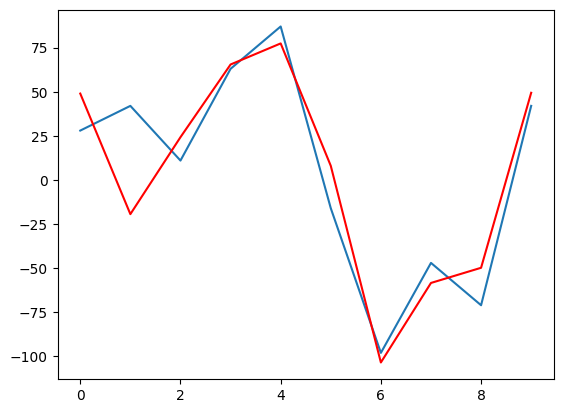

In [64]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# train autoregression
model = AutoReg(train, lags=best_lags, seasonal=best_seasonal, period = best_period)		# lags = (1, 2, 3, ..., 12)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## MA (Moving Average)

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficients: [ 2.48741859e+00  4.62438745e-02 -8.64592049e-02 -2.40402983e-01
 -2.32416109e-01  2.30577978e-02 -1.07991400e-01 -3.86954070e-03
 -2.45087372e-01 -2.20617403e-01 -6.46512826e-02  4.22129603e-02
  9.86352961e-01  2.80012048e+02]
predicted=18.918120, expected=28.000000
predicted=-2.254449, expected=42.000000
predicted=25.969898, expected=11.000000
predicted=31.970894, expected=63.000000
predicted=53.556337, expected=87.000000
predicted=-9.984701, expected=-16.000000
predicted=-32.344367, expected=-98.000000
predicted=-14.049990, expected=-47.000000
predicted=1.935539, expected=-71.000000
predicted=35.668080, expected=42.000000
Test RMSE: 38.908


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


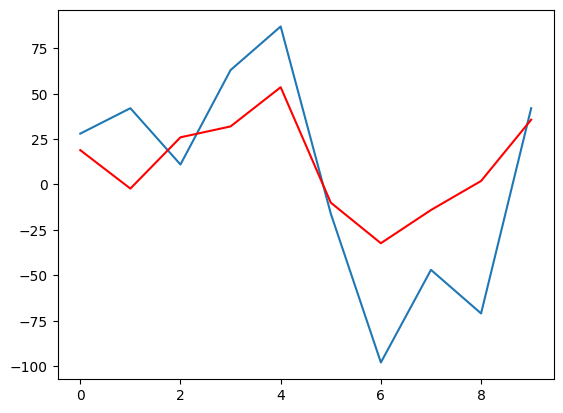

In [68]:
# create and evaluate a MA
from statsmodels.tsa.arima.model import ARIMA

# train MA
model = ARIMA(train, order=(0, 0, 12))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1133.3032981667782 1226.0341717652072 [ 2.53759484e+00 -2.65820472e-03 -2.19868272e-01 -4.15297055e-01
 -3.74705666e-01  1.24033697e-01 -1.49960525e-01 -1.28259405e-02
 -1.77322982e-01  4.73430251e-01 -2.72225235e-01  8.73141115e-02
  9.55488182e-01  2.50985301e-01 -9.20298985e-02 -7.86179985e-01
 -8.01653142e-01  1.28146468e-01  3.02287284e-01  8.75191061e-02
 -3.39096723e-01  5.60778169e-01 -8.43522863e-02  1.11181089e-01
  3.79125117e-01  1.63257603e-02  2.10900411e-01 -5.80171847e-01
 -5.69334758e-01 -1.83121168e-01  3.73382245e-01  1.15219734e+02]
order = (0, 0, 30)
{'aic': 1133.3032981667782, 'hqic': 1170.9861302152658, 'bic': 1226.0341717652072, 'RMSE': 34.77980814074385, 'MAE': 29.11030667660994, 'MAPE': 0.7245473625499094, 'R2': 0.6324738767149195, 'NSE': 0.6324738767149195, 'KGE': 0.1880712407606766}
predicted=43.510780, expected=28.000000
predicted=14.201453, expected=42.000000
predicted=30.081433, expected=11.000000
predicted=0.415862, expected=63.000000
predicted=42.436264

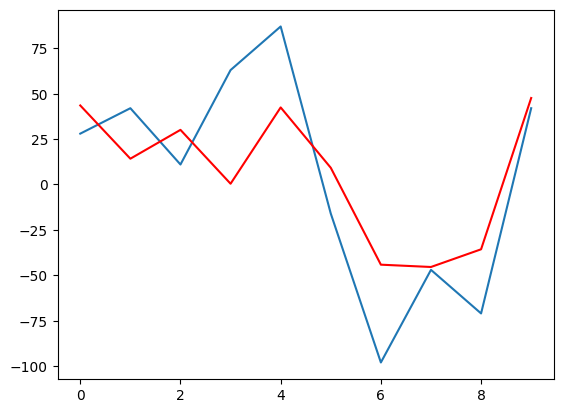

In [87]:
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def get_best_model_results(list_orders, data, data_length):
    dict_models = {}
    for idx, order in enumerate(list_orders):
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        res_train = {
            "aic": model_fit.aic,
            "hqic": model_fit.hqic,
            "bic": model_fit.bic,
        }
        pred = model_fit.predict(start=len(train), end=data_length-1, dynamic=False)
        evaluator = RegressionMetric(test, pred)
        res_test = evaluator.get_metrics_by_list_names(["RMSE", "MAE", "MAPE", "R2", "NSE", "KGE"])
        #print(order, {**res_train, **res_test})
        dict_models[idx] = [model, order, model_fit, model_fit.aic, {**res_train, **res_test}]
    list_models = sorted(dict_models.values(), key=lambda x: x[3])
    return list_models[0]

# fit model
list_orders = [(0,0,i) for i in range(3,31,3)]
model = get_best_model_results(list_orders, train, len(data))
print(model[2].aic, model[2].bic, model[2].params)
print("order =", model[1])

print(model[4])

predictions = model[2].predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARMA (Autoregressive Moving Average) model

Coefficients: [ 2.47481379e+00  1.01584668e+00 -5.76973695e-01 -9.18813673e-01
  3.45085771e-01 -4.18215789e-02 -2.68688620e-01  8.64753143e-01
 -9.80446479e-01  4.31302056e+02]
predicted=9.543326, expected=28.000000
predicted=-4.989265, expected=42.000000
predicted=31.250372, expected=11.000000
predicted=13.475228, expected=63.000000
predicted=18.591448, expected=87.000000
predicted=2.085998, expected=-16.000000
predicted=-7.219037, expected=-98.000000
predicted=-7.148316, expected=-47.000000
predicted=-1.707714, expected=-71.000000
predicted=3.778300, expected=42.000000
Test RMSE: 51.488


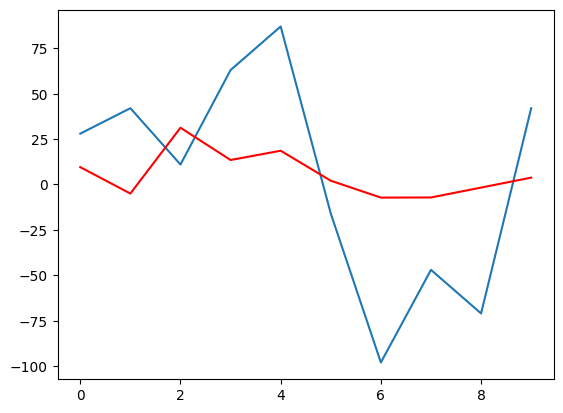

In [88]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train, order=(2, 0, 6)) # p =2, q = 6
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

aic:1039.9708721381367, bic:1089.2341487373021, params:[ 2.19295747e+00  1.41950307e-01 -2.42176031e-01  8.28195672e-02
 -1.97100133e-01  9.19956415e-02 -2.15218640e-01  7.60313215e-02
 -2.26841365e-01  9.66656611e-02 -2.23176568e-01  1.07764079e-01
  7.12444229e-01 -3.40287554e-01  2.53329950e-01 -3.09546585e-01
  9.48795984e+01]
order = (12, 0, 3)
{'aic': 1039.9708721381367, 'hqic': 1059.9898766638958, 'bic': 1089.2341487373021, 'RMSE': 22.10543143830635, 'MAE': 18.196772123326774, 'MAPE': 0.5900038842284362, 'R2': 0.8515323477804561, 'NSE': 0.8515323477804561, 'KGE': 0.5888091845595282}
predicted=48.966790, expected=28.000000
predicted=-5.323092, expected=42.000000
predicted=25.728520, expected=11.000000
predicted=50.497940, expected=63.000000
predicted=72.433743, expected=87.000000
predicted=9.873744, expected=-16.000000
predicted=-91.243001, expected=-98.000000
predicted=-57.603761, expected=-47.000000
predicted=-42.817553, expected=-71.000000
predicted=41.535948, expected=42.0000

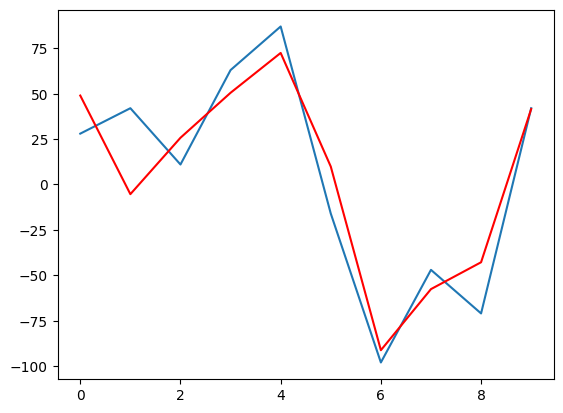

In [94]:
# fit model
list_orders = [(i,0,j) for i in range(3,13,3) for j in range(3,13,3)]
model = get_best_model_results(list_orders, train, len(data))
print(f'aic:{model[2].aic}, bic:{model[2].bic}, params:{model[2].params}')
print("order =", model[1])

print(model[4])

predictions = model[2].predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## ARIMA (Autogressive Intergrated Moving Average) model

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficients: [ 2.50982022e+00  2.40073189e-01 -1.71059955e-01 -5.44777454e-01
 -2.06493447e-01 -2.65144256e-01  6.00625830e-01 -6.47382408e-01
 -4.75340258e-01  4.94591142e+02]
predicted=30.650443, expected=28.000000
predicted=-17.977685, expected=42.000000
predicted=-15.277918, expected=11.000000
predicted=31.887928, expected=63.000000
predicted=44.755087, expected=87.000000
predicted=17.316717, expected=-16.000000
predicted=-17.166445, expected=-98.000000
predicted=-27.761059, expected=-47.000000
predicted=-9.458049, expected=-71.000000
predicted=15.533977, expected=42.000000
AIC=1242.641605259893; BIC=1271.620003259402
Test RMSE: 44.215


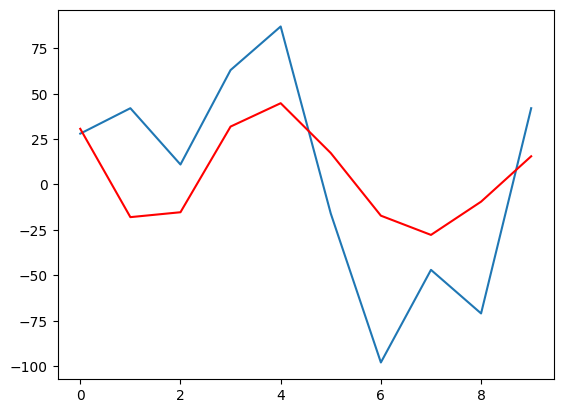

In [95]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train, order=(3, 0, 5))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))


print('AIC={}; BIC={}'.format(model_fit.aic, model_fit.bic))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


aic:1270.595076569718, bic:1316.5982337409364, params:[-1.70562415e+00 -1.93542665e+00 -1.60392370e+00 -1.84688407e+00
 -1.61673944e+00 -9.66050352e-01 -6.90674347e-01 -4.69221994e-01
 -3.44270880e-01  1.04409843e+00 -5.44466814e-01 -4.48445989e-01
 -4.05694580e-01  1.04883173e+00 -1.82588652e-01  7.59649073e+02]
order = (6, 3, 9)
{'aic': 1270.595076569718, 'hqic': 1289.2882151356296, 'bic': 1316.5982337409364, 'RMSE': 45.16972535270395, 'MAE': 36.16520398353254, 'MAPE': 0.7597037099722751, 'R2': 0.3800898467048768, 'NSE': 0.3800898467048768, 'KGE': -1.8233140856785477}
predicted=-23.895321, expected=28.000000
predicted=-48.239041, expected=42.000000
predicted=4.855269, expected=11.000000
predicted=36.630008, expected=63.000000
predicted=30.900818, expected=87.000000
predicted=-13.572519, expected=-16.000000
predicted=-44.857469, expected=-98.000000
predicted=-19.394523, expected=-47.000000
predicted=-25.278350, expected=-71.000000
predicted=44.006632, expected=42.000000
Test RMSE: 45.

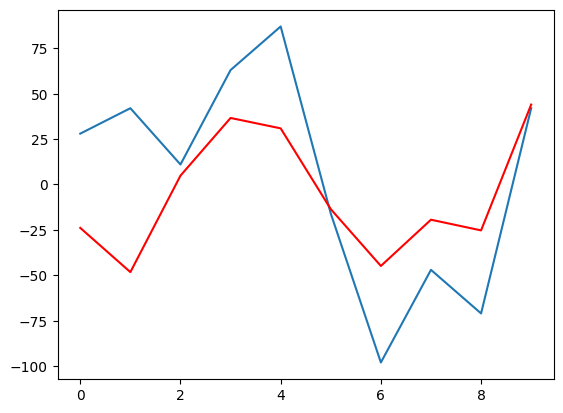

In [96]:
# fit model
list_orders = [(i,j,k) for i in range(3,7,3) for j in range(3,7,3) for k in range(3,13,3)]
model = get_best_model_results(list_orders, train, len(data))
print(f'aic:{model[2].aic}, bic:{model[2].bic}, params:{model[2].params}')
print("order =", model[1])

print(model[4])

predictions = model[2].predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()